In [ ]:
# import modulo os e installazione di rtree e altro per far funzionare l'sjoin
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

In [ ]:
import pandas as pd
!pip install geopandas
import geopandas
!pip install contextily
import contextily as ctx

In [ ]:
milano = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm.zip")
area_sosta = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/bike_areesosta.zip")
stradario =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/stradario.csv")

- una lista (elenco) delle aree di sosta, indicando il nome della via, il numero civico e il numero di posti totali per le biciclette

In [ ]:
stradario["CODICE_VIA"] = stradario["CODICE_VIA"].astype(str)

elenco_aree_sosta = pd.merge(area_sosta, stradario, how = "inner", left_on = "id_via", right_on = "CODICE_VIA")
elenco_aree_sosta2 = elenco_aree_sosta[["AREA", "DESCRIZIONE_VIA", "CIVICO", "stalli_tot"]]
elenco_aree_sosta2

AREA DESCRIZIONE_VIA  CIVICO  stalli_tot
0      PZA   ABBIATEGRASSO       1          15
1      PZA   ABBIATEGRASSO       2          15
2      PZA   ABBIATEGRASSO       7          15
3      PZA   ABBIATEGRASSO       8          15
4      PZA   ABBIATEGRASSO      12          15
...    ...             ...     ...         ...
39919  VIA     SAN DIONIGI     117          30
39920  VIA     SAN DIONIGI     119          30
39921  VIA     SAN DIONIGI     120          30
39922  VIA     SAN DIONIGI     121          30
39923  VIA     SAN DIONIGI     135          30

[39924 rows x 4 columns]

- una lista (elenco) analogo al precedente ma con anche  l'indicazione del quartiere

In [ ]:
quartieri_sosta = geopandas.sjoin(elenco_aree_sosta, milano, op = "within", how = "left")
quartieri_sosta2 = quartieri_sosta[["AREA", "DESCRIZIONE_VIA", "CIVICO", "stalli_tot", "NIL"]]
quartieri_sosta2

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


AREA  ...                                                NIL
0      PZA  ...  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
1      PZA  ...  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
2      PZA  ...  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
3      PZA  ...  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
4      PZA  ...  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
...    ...  ...                                                ...
39919  VIA  ...                                       SCALO ROMANA
39920  VIA  ...                                       SCALO ROMANA
39921  VIA  ...                                       SCALO ROMANA
39922  VIA  ...                                       SCALO ROMANA
39923  VIA  ...                                       SCALO ROMANA

[39924 rows x 5 columns]

- i nomi dei quartieri in cui non ci sono aree di sosta;

In [ ]:
quartieri_no_aree = milano[~ milano["NIL"].isin(quartieri_sosta["NIL"])]
quartieri_no_aree[["NIL"]]

NIL
1                   TRENNO
5                   FIGINO
22              STEPHENSON
23               CANTALUPA
24              QUINTOSOLE
28   PARCO BOSCO IN CITTA'
36                 ASSIANO
46    RONCHETTO DELLE RANE
48  MONLUE' - PONTE LAMBRO
54             CHIARAVALLE
80         CASCINA MERLATA
82       PARCO DEI NAVIGLI

- una mappa di Milano con l'indicazione dei quartieri in cui non ci sono aree di sosta

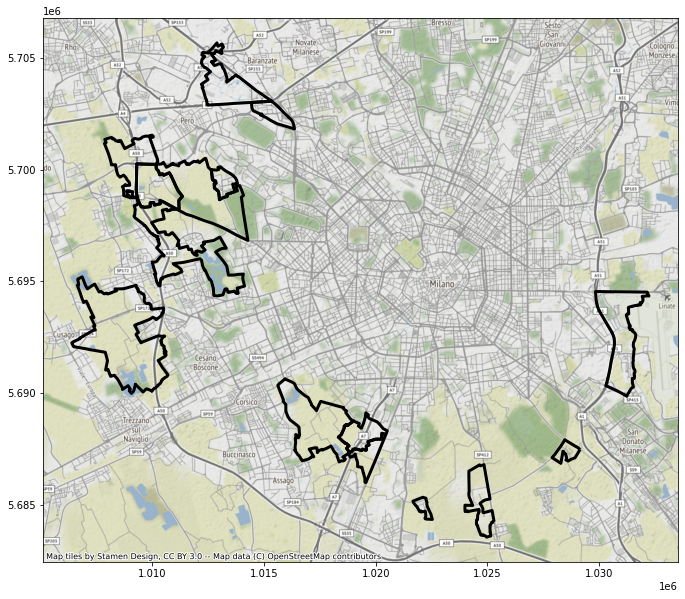

In [ ]:
ax = quartieri_no_aree.to_crs(epsg=3857).plot(figsize = (20,10), facecolor = "none", edgecolor = "k", linewidth = 3)
ctx.add_basemap(ax)

- il nome del quartiere con più aree di sosta;

In [ ]:
quartieri_numero_aree = quartieri_sosta.groupby("NIL", as_index = False)[["stalli_tot"]].count()
quartiere_max = quartieri_numero_aree[quartieri_numero_aree["stalli_tot"] == quartieri_numero_aree["stalli_tot"].max()]
quartiere_max

NIL  stalli_tot
31  LORETO - CASORETTO - NOLO        4090

- una mappa di Milano con l'indicazione del quartiere con più aree di sosta;

In [ ]:
quartieri_count = pd.merge(quartieri_numero_aree, milano, how = "right", on = "NIL")
quartieri_count

NIL  ...                                           geometry
0   RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1                                           TRENNO  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
2                                         PORTELLO  ...  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...
3                                        BOVISASCA  ...  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...
4                                       PARCO NORD  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
..                                             ...  ...                                                ...
83                                          PAGANO  ...  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...
84                                           BRERA  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...
85                         ROGOREDO - SANTA GIULIA  ...  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...
86                                         ADRIANO  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
87                                     LORENTEGGIO  ...  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...

[88 rows x 10 columns]

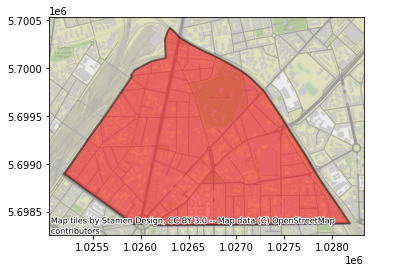

In [ ]:
loreto = quartieri_count[quartieri_count["stalli_tot"] == quartieri_count["stalli_tot"].max()]

ax = loreto.to_crs(epsg=3857).plot(facecolor = "r", edgecolor = "k", linewidth = 2, alpha = 0.5)
ctx.add_basemap(ax)

- i nomi dei quartieri con un numero di aree di sosta minori della media;

In [ ]:
media = quartieri_numero_aree["stalli_tot"].mean()
quartieri_minori_media = quartieri_count[quartieri_count["stalli_tot"] < media]
quartieri_minori_media

NIL  ...                                           geometry
0      RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
2                                            PORTELLO  ...  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...
3                                           BOVISASCA  ...  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...
4                                          PARCO NORD  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
7                   QUARTO OGGIARO - VIALBA - MUSOCCO  ...  POLYGON ((9.13481 45.52095, 9.13481 45.52094, ...
9                                      QUARTO CAGNINO  ...  POLYGON ((9.11143 45.47640, 9.11193 45.47624, ...
10                                 STADIO - IPPODROMI  ...  POLYGON ((9.13020 45.48464, 9.13075 45.48449, ...
11                                      QUINTO ROMANO  ...  POLYGON ((9.08375 45.48485, 9.08444 45.48459, ...
14                                           SAN SIRO  ...  POLYGON ((9.14606 45.46695, 9.14500 45.46705, ...
15                                           COMASINA  ...  POLYGON ((9.16951 45.52514, 9.16887 45.52397, ...
16                                            TIBALDI  ...  POLYGON ((9.18775 45.43732, 9.18644 45.43733, ...
17                                    GRECO - SEGNANO  ...  POLYGON ((9.21220 45.50971, 9.21224 45.50922, ...
18                             DE ANGELI - MONTE ROSA  ...  POLYGON ((9.15164 45.48045, 9.15161 45.47983, ...
19                                             FARINI  ...  POLYGON ((9.17234 45.49665, 9.17328 45.49670, ...
20                                           BRUZZANO  ...  POLYGON ((9.17808 45.53479, 9.17807 45.53439, ...
21                                               QT 8  ...  POLYGON ((9.14479 45.48565, 9.14447 45.48546, ...
25                                     PARCO SEMPIONE  ...  POLYGON ((9.17958 45.47255, 9.17636 45.47043, ...
26                                             BARONA  ...  POLYGON ((9.16112 45.42589, 9.16056 45.42605, ...
31                                  TRIULZO SUPERIORE  ...  POLYGON ((9.26378 45.43251, 9.26384 45.43248, ...
33              TALIEDO - MORSENCHIO - Q.RE FORLANINI  ...  POLYGON ((9.25129 45.46198, 9.25139 45.46081, ...
34                PORTA TICINESE - CONCA DEL NAVIGLIO  ...  POLYGON ((9.18740 45.45603, 9.18736 45.45584, ...
35                                          TRE TORRI  ...  POLYGON ((9.16028 45.48030, 9.16022 45.48005, ...
37                                          MORIVIONE  ...  POLYGON ((9.20060 45.43608, 9.20026 45.43606, ...
38                            VIGENTINO - Q.RE FATIMA  ...  POLYGON ((9.20060 45.43608, 9.20429 45.43642, ...
39                                            BICOCCA  ...  POLYGON ((9.22259 45.52361, 9.22220 45.52320, ...
40                                        ORTOMERCATO  ...  POLYGON ((9.23747 45.45782, 9.23740 45.45627, ...
42                                           MUGGIANO  ...  POLYGON ((9.07736 45.45589, 9.07671 45.45364, ...
43                         PORTA TICINESE - CONCHETTA  ...  POLYGON ((9.17348 45.45583, 9.17417 45.45535, ...
44                       UMBRIA - MOLISE - CALVAIRATE  ...  POLYGON ((9.22392 45.45969, 9.22392 45.45934, ...
45                                            ROSERIO  ...  POLYGON ((9.13006 45.52294, 9.13006 45.52293, ...
50       GRATOSOGLIO - Q.RE MISSAGLIA - Q.RE TERRAZZE  ...  POLYGON ((9.17334 45.42346, 9.17402 45.42205, ...
51                                      PORTA MAGENTA  ...  POLYGON ((9.15520 45.46687, 9.15697 45.46675, ...
53                                           GHISOLFA  ...  POLYGON ((9.17303 45.49060, 9.17328 45.49024, ...
55                                PARCO DELLE ABBAZIE  ...  POLYGON ((9.21711 45.43187, 9.21733 45.43160, ...
56                            MACIACHINI - MAGGIOLINA  ...  POLYGON ((9.18489 45.50554, 9.18724 45.50518, ...
57                                         BANDE NERE  ...  POLYGON ((9.12727 45.46894, 9.

- una mappa di Milano con l'indicazione  dei quartieri con un numero di aree di sosta minori della media;

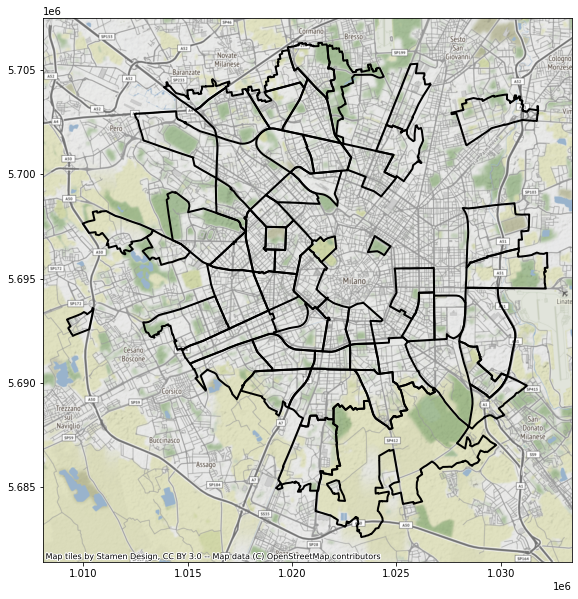

In [ ]:
ax = quartieri_minori_media.to_crs(epsg=3857).plot(figsize=(20,10), facecolor = "none", edgecolor = "k", linewidth = 2)
ctx.add_basemap(ax)

- una mappa di Milano con i diversi quartieri e l'indicazione delle aree di sosta, sottoforma di punti rossi;

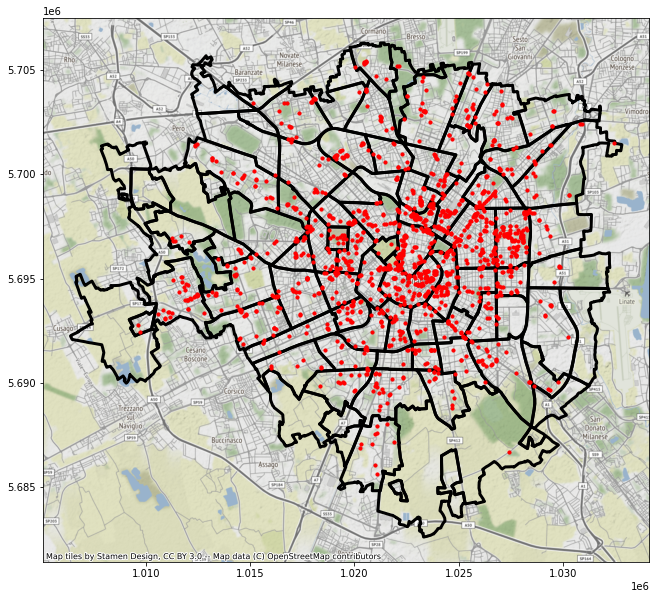

In [ ]:
ax = milano.to_crs(epsg=3857).plot(figsize = (20,10), facecolor = "none", edgecolor = "k", linewidth = 3)
area_sosta.to_crs(epsg=3857).plot(ax = ax, color = "red", markersize = 10)
ctx.add_basemap(ax)

- una mappa di Milano con i diversi quartieri colorati a seconda del numero di aree di sosta presenti, con una legenda che indichi il significato dei colori;

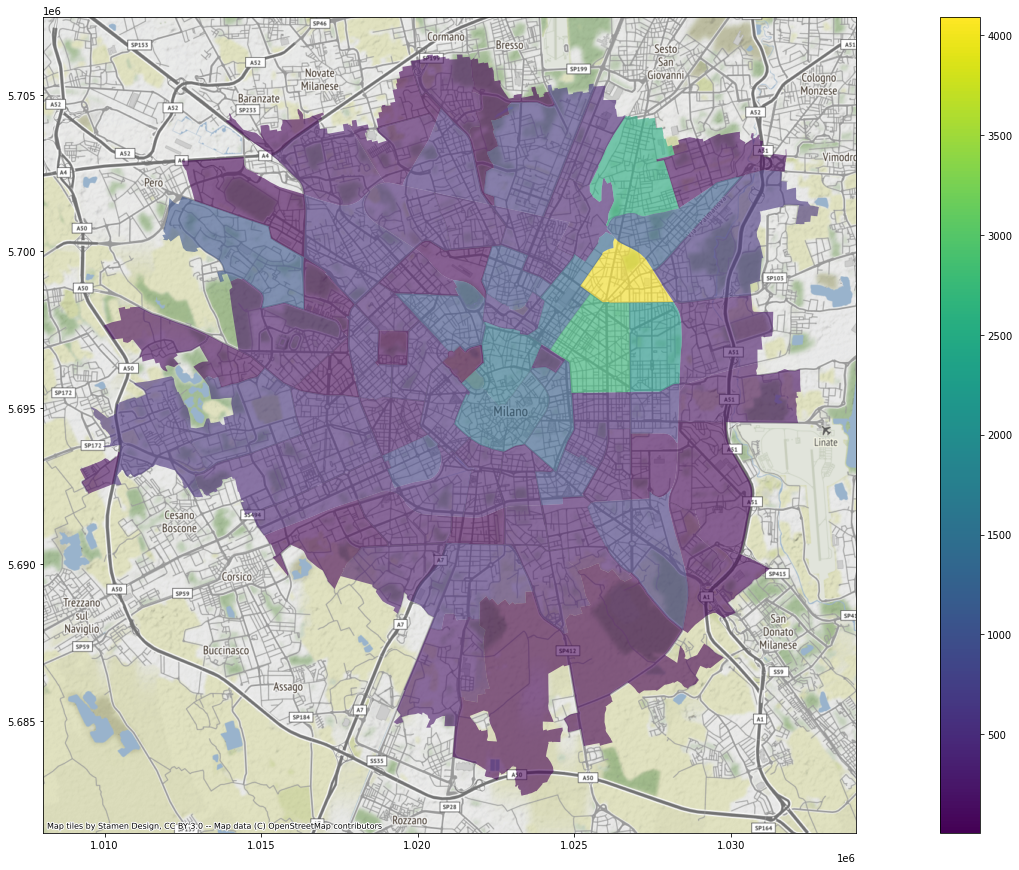

In [ ]:
ax = quartieri_count.to_crs(epsg=3857).plot(column = "stalli_tot", alpha = 0.6, figsize = (30,15), legend = True)
ctx.add_basemap(ax)